# Assignement 1 - Social Graphing - 29-09/2020

## Part 1: Binning degree distributions

In [1]:
import numpy as np
import random
import statistics
import math
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

### Binning real numbers

**Usethe random library generate 5000 data points from a Gaussian distribution with $\mu = 2$ and $\sigma = 0.125$.**

In [2]:
mu , sigma = 2 , 0.125
numbers=[]
for i in range(5000):
    numbers.append(random.gauss(mu, sigma))

**Use numpy.histogram to bin those number into 10 bins. What does the numpy.histogram function return? Do the two arrays have the same length?**

In [3]:
hist, bin1 = np.histogram(numbers, bins=10)

The numpy histogram functions returns 2 vectors, The bin vector contains the x-coordinates of the bars, where the hist vector contains magnitude of the the bins.

In [4]:
print(f"Shape of hist vector is {hist.shape}")
print(f"Shape of bin vector is {bin1.shape} \nThe two vectors does not have the same lenght" )

Shape of hist vector is (10,)
Shape of bin vector is (11,) 
The two vectors does not have the same lenght


**Use matplotlib.pyplot.plot to plot the binned data. You will have to deal with the fact that the counts- and bin-arrays have different lengths. Explain how you deal with this problem and why.**

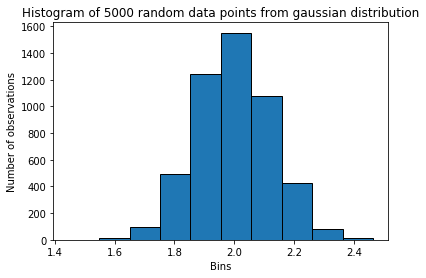

In [5]:
fig, ax = plt.subplots()
ax.bar(bin1[:-1], hist, width=np.diff(bin1), edgecolor="black", align="edge")
ax.set_ylabel("Number of observations")
ax.set_xlabel("Bins")
ax.set_title("Histogram of 5000 random data points from gaussian distribution")
plt.show()

_Figure 1_1: Bar plot of 5000 data points generated using gaussian distribution with mu = 2, sigma = 0.125_

By using bar plot, we exclude the last element of the bin vector, since the interval between the bins are the same, it bar plot only need the start coordinate of the last bin.

### Binning integers

**Use numpy.random.poisson to generate 5000 numbers drawn from a Poisson distribution characterized by $\lambda = 10$. Find the maximum and minimum value of your 5000 random numbers.**

In [6]:
numbers2 = np.random.poisson(lam=10,size=5000)
print(f"The maximum value is {np.max(numbers2)}")
print(f"The minimum value is {np.min(numbers2)}")

The maximum value is 24
The minimum value is 0


**Create a vector $v$ that results in a binning that puts each integer value in its own bin and where the first bin contains the minimum number you found above, and the last bin contains the maximum number**

In [7]:
v = np.unique(numbers2)
v

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

**Use the vector by setting numpy.histogram's bin parameter as bin = $v$. What is the sum over bin counts? Explain how the binning-vectors first and last element relates to the min and max from the Poisson distribution.**

In [8]:
hist2, bin2 = np.histogram(numbers2, bins=v)
bin_counts = dict(zip(v, hist2))
print(f"The sum over bin counts is {bin_counts}")

The sum over bin counts is {0: 1, 1: 2, 2: 7, 3: 34, 4: 121, 5: 175, 6: 312, 7: 436, 8: 565, 9: 601, 10: 650, 11: 592, 12: 471, 13: 371, 14: 228, 15: 172, 16: 104, 17: 73, 18: 53, 19: 17, 20: 8, 21: 2, 22: 1, 23: 4}


**Use a bar chart (matplotlib.pyplot.bar) to plot the distribution**

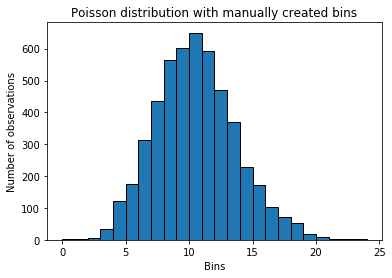

In [9]:
fig, ax = plt.subplots()
ax.bar(bin2[:-1], hist2, width=np.diff(bin2), edgecolor="black", align="edge")
ax.set_ylabel("Number of observations")
ax.set_xlabel("Bins")
ax.set_title("Poisson distribution with manually created bins")

plt.show()

_Figure 1_2: Bar plot of 5000 data points generated from the poission distriution lambda = 10, with manually created bins_

### Binning and plotting degree distributions.

**Generate the Erdös-Renyi (ER), network which has a degree distribution that matches the Poisson distribution above**

To generate Erdös-renyi network we have to find p. N is all ready known. Lambda from the poission distribution corresponds to the average degree <k> and we can hereby solve the $<k> = p*(n-1)$ for p

In [10]:
n=5000
p=10/(n-1)

**Now, use networkx to create the graph and extract the degree distribution.**

In [11]:
er_graph=nx.erdos_renyi_graph(n, p, seed=None, directed=False)
degress = [er_graph.degree(i) for i in er_graph.nodes()]

**create a nice bar plot of the degree distribution, including axes labels and a plot title. Make sure that it looks like the Poisson distribution you plotted above.**

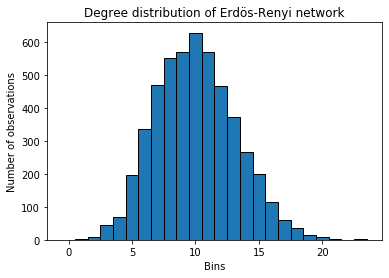

In [12]:
hist3, bin3 = np.histogram(degress, bins=v)
fig, ax = plt.subplots()
ax.bar(bin3[:-1], hist3, width=np.diff(bin3), edgecolor="black")
ax.set_ylabel("Number of observations")
ax.set_xlabel("Bins")
ax.set_title("Degree distribution of Erdös-Renyi network")

plt.show()

_Figure 1_3: Bar plot of the degree distribution of the Erdös-Renyi network_

## Part 2: Random networks and plotting in networkx

**Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10^(–3).** 

* **What is the expected number of links, 〈L〉?**

In [13]:
p = 10**(-3)
N = 3000
L = (p*N*(N-1))/2 #Box 3.11, Network Science by Albert-Laszlo Barabasi section 3.11
print(f"The expected number of links is {L}")

The expected number of links is 4498.5


**In which regime is the network?**

The average degree of a network 〈k〉 determine which regime the network belongs to. So we start by calculating 〈k〉.

In [14]:
k = p*(N-1)
print(f"The average degree <k> is {k}")

The average degree <k> is 2.999


The network belongs to the supercritical regime because 〈k〉 > 1. # Network Science by Albert-Laszlo Barabasi section 3.6

**Calculate the probability p_c so that the network is at the critical point**

A network is a the critical point if its 〈k〉 = 1. So we isolate p in the formal for 〈k〉. #Network Science by Albert-Laszlo Barabasi section 3.6

In [15]:
k = 1
N = 3000
p = k/(N-1)
print(p)

0.00033344448149383126


p_c should be 0.00033344448149383126 for the network with 3000 nodes to be at the critical point.

**Given the linking probability p = 10^(–3), calculate the number of nodes N^(cr) so that the network has only one component.**

A network with only one component belongs to the connected regime. So there applies two crateria;
1. 〈k〉 > ln(N)
2. p > ln(N)/N

And with the values from the question;
1. 10^(-3) * (N-1) > ln(N)
2. 10^(-3) > ln(N)/N

The two equations with one unknown is solved using the website; https://www.wolframalpha.com/input/?i=10%5E-3*%28n-1%29+%3E+ln%28n%29+and+10%5E-3+%3E+ln%28n%29%2Fn&fbclid=IwAR1joTQ-hRdIru8YGjic3iwGYD2Ezfvgaqr1tWLSnNdsa3XKedEFZHag0y0

The number of nodes should either be 0 < n < 1 or n > 9119.13

**For the network in (d), calculate the average degree 〈k^(cr)〉 and the average distance between two randomly chosen nodes 〈d〉.**

The network from question (d) have 9120 nodes because a network can't have half nodes. The linking probability p = 10^(–3).

In [16]:
# average degree
N = 9120
p = 10**(-3)
k = p*(N-1)
print(f'The average degree is {k}')

# average distance
d = math.log(N)/math.log(k)
print(f'The average distance is {d}')

The average degree is 9.119
The average distance is 4.12522144293705


**Calculate the degree distribution p_k of this network (approximate with a Poisson degree distribution).**

In [17]:
yakse = []
x = np.arange(50)
for i in range(len(x)):
    yakse.append(math.exp(-k)*((k**x[i])/math.factorial(x[i])))

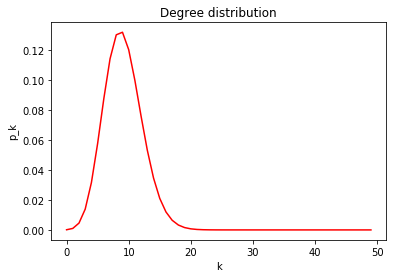

In [18]:
plt.plot(x, yakse,'r')
plt.xlabel('k')
plt.ylabel('p_k')
plt.title('Degree distribution')
plt.show()

_Figure 2_1: The degree distribution of a network with 9120 nodes and a linking probability of 10^(-3), You can see that distributions have a peak around 〈k〉, the average degree. Which makes sense because the probability that a randomly chosen node has the degree of 〈k〉 is the highest._

**Paths. Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look likme. For example, you may want to shrink the node size).**

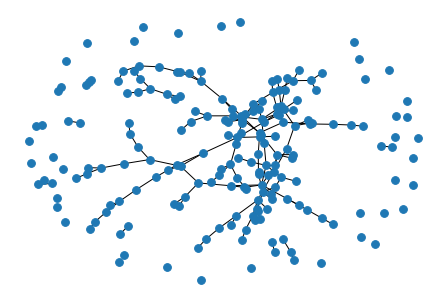

In [19]:
k = 1.5
N = 200
p = k/(N-1)

G = nx.erdos_renyi_graph(N,p)
pos = nx.spring_layout(G,k=0.1,iterations=50)
nx.draw(G, pos, with_labels=False, node_size=60)

_Figure 2_2: Random network with N = 200 nodes and average degree k = 1.5 and p = 0.0075 generated using nx.erdos_renyi_graph(N,p)_

**Extract the Giant Connected Component, GCC.**

In [20]:
# Making a list with all the connected components
graphs = (G.subgraph(c) for c in nx.connected_components(G))
# Find GCC
GCC = max(graphs, key=len)
# Find the number of nodes and edges in GCC
print(f'Number of nodes in the GCC {GCC.number_of_nodes()}')
print(f'Number of edges in the GCC {GCC.number_of_edges()}')

Number of nodes in the GCC 134
Number of edges in the GCC 142


**Choose a node at random from the GCC. Find all nodes that are precisely 2 steps away from that node.**

In [21]:
# Making a list of nodes in GCC
GCC_nodes = list(GCC.nodes())

# Choosing random node
random_node = random.choice(GCC_nodes)
print(f'The chosen random node is {random_node}')

# Makes a list of nodes which are 2 or less steps away from the random choosen node
list_of_paths = nx.single_source_shortest_path_length(GCC,source = random_node,cutoff = 2)

# Sorting which nodes there are 2 steps away from the random selected node
Nodes_with_distane_2 = []

for key, value in list_of_paths.items():
    
    if value == 2:
        Nodes_with_distane_2.append(key)

print(f'The nodes there are 2 steps away from the random selected node {random_node} is {Nodes_with_distane_2}')

The chosen random node is 105
The nodes there are 2 steps away from the random selected node 105 is [136, 168, 9, 184]


**Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2").**

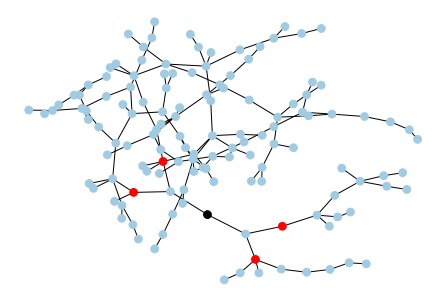

In [22]:
# Empty list for colors
color_map = [] 

# Loop to assign colors to the different nodes
for node in GCC:
    if node in Nodes_with_distane_2:
        color_map.append('#ff0000')
    elif node == random_node: 
        color_map.append('#000000')
    else:
        color_map.append('#A0CBE2')

# ploting the graph
pos = nx.spring_layout(GCC,k=0.1,iterations=50)
nx.draw(GCC, pos, node_color=color_map, with_labels=False, node_size=60)
plt.show()

_Figure 2_3: GCC plottet with starting node coloured black and the note 2 steps away colored red_

## Part 3: Binning degree distributions

**Use nx.watts_strogatz_graph to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1, \textrm{and} 1$. Calculate the average shortest path length $\langle d \rangle$ for each one. Describe what happens to the network when $p = 1$.**

In [23]:
G0 = nx.watts_strogatz_graph(500, 4, 0, seed=None)
G01 = nx.watts_strogatz_graph(500, 4, 0.1, seed=None)
G1 = nx.watts_strogatz_graph(500, 4, 1, seed=None)
print(f"The shortest path at G0 is {nx.average_shortest_path_length(G0, weight=None)}")
print(f"The shortest path at G0.1 is {nx.average_shortest_path_length(G01, weight=None)}")
print(f"The shortest path at G1 is {nx.average_shortest_path_length(G1, weight=None)}")

The shortest path at G0 is 62.875751503006015
The shortest path at G0.1 is 8.009274549098196
The shortest path at G1 is 4.7629258517034065


When p=1, then we are at max randomization in the network. This results in less local clustering, and thereby the average shortest path between nodes is reduced. An example of this is the Six degrees of separation. https://en.wikipedia.org/wiki/Six_degrees_of_separation

**Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$.** 

In [24]:
p = [0,0.01,0.03,0.05,0.1,0.2]
N , k = 500 , 4
p0 , p01 , p03, p05, p1, p2 = [] , [] ,[], [], [], []
list_of_list=[p0 , p01 , p03, p05, p1, p2]

In [25]:
for i in range(len(p)): #Looping over each value of p
    for j in range(50): #Generating 50 networks for current value of p
        G = nx.watts_strogatz_graph(500, 4, p[i], seed=None)
        list_of_list[i].append(nx.average_shortest_path_length(G, weight=None))

**Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add errorbars to the plot.**

In [26]:
avg_s = []
std = []
for i in range(len(p)): #Generating avg <d> and strandard deviation
    avg_s.append(sum(list_of_list[i])/len(list_of_list[i]))
    std.append(statistics.stdev(list_of_list[i]))

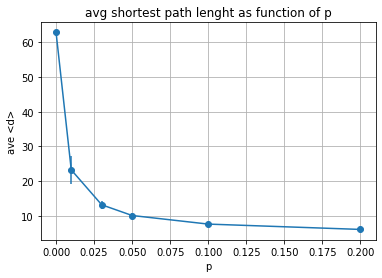

In [27]:
fig, (ax0) = plt.subplots(nrows=1, sharex=True)
ax0.errorbar(p, avg_s, yerr=std, fmt='-o')
ax0.set_title('avg shortest path lenght as function of p')
ax0.set_xlabel('p')
ax0.set_ylabel('ave <d>')
ax0.grid(zorder=0)

_Figure 3_1: The figure shows the average distance between nodes as a function of the rewiring probability p. It is clear that the more random a graph is, the shorter is the average distance between nodes_

## Part 4. The Barabasi-Albert Model

**Create a 100 node BA network using a BA model that you've coded on your own and plot it using NetworkX.**

In [28]:
#Creating a graph with 3 nodes where 1,2 and 2,3 is connected
Bi = nx.Graph()
Bi.add_edges_from([(1,2),(2,3)])

In [29]:
for i in range(4,101,1): 
    k = np.array([list(Bi.edges())]).flatten() #selecting a node with probability proportional to it's degree
    rn=random.choice(k)
    Bi.add_edge(rn,i) # Adding an edge between the new node and the random node

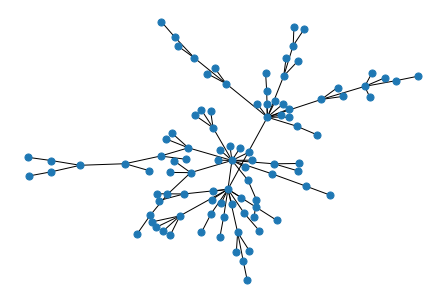

In [30]:
nx.draw(Bi, node_size=50)

_Figure 4_1: Network created using The Barabasi-Albert model with N=100_

**Now create a 5000 node network.**

In [31]:
for i in range(100,5001,1): # Same procedure for creating the Barabasi-Albert Model
    k = np.array([list(Bi.edges())]).flatten()
    rn=random.choice(k)
    Bi.add_edge(rn,i)

**What's the maximum and minimum degree?**

In [32]:
deg = list(Bi.degree())
deg_values=[]

for i in range(len(deg)):
    deg_values.append(deg[i][1])
print(f"The number of nodes is {len(Bi.nodes())}")
print(f"The maximum degree is {max(deg_values)}")
print(f"The maximum degree is {min(deg_values)}")

The number of nodes is 5000
The maximum degree is 143
The maximum degree is 1


**Now, bin the degree distribution, for example using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.**

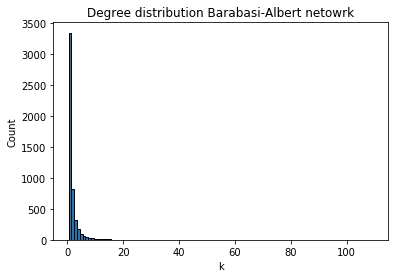

In [33]:
hist4, bin4 = np.histogram(deg_values, bins=np.unique(deg_values))
fig, ax = plt.subplots()
ax.bar(bin4[:-1], hist4, width=np.diff(bin4), edgecolor="black")
ax.set_ylabel('Count')
ax.set_xlabel('k')
ax.set_title("Degree distribution Barabasi-Albert netowrk")
plt.show()

_Figure 4_2: Bar-plot showing the Degree distribution of the Barabasi-Albert-network and manually created bins._

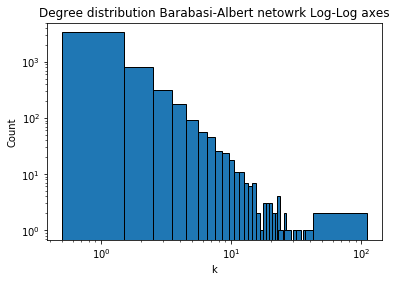

In [34]:
fig, ax = plt.subplots()
ax.bar(bin4[:-1], hist4, width=np.diff(bin4), edgecolor="black")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('k')
ax.set_title("Degree distribution Barabasi-Albert netowrk Log-Log axes")
plt.show()

_Figure 4_3: Bar-plot showing the Degree distribution of the Barabasi-Albert-network and manually created bins with log transformed axis._

## Part 5 Power-laws and the friendship paradox

**Let's explore that in the 5000 node BA network we've just generated. Do the following:**

**Pick a node i at random (e.g. use random.choice). Find its degree.**

In [35]:
nodes=list(Bi.nodes)
rn=random.choice(nodes)
rn_deg=Bi.degree(rn)
print(f"The random chosen node I is number {rn} and its degree is {rn_deg}")

The random chosen node I is number 4942 and its degree is 1


**Find i's neighbors and calculate their average degree.**

In [36]:
nb=list(Bi.neighbors(rn))
su=0
for i in range(len(nb)):
    su += Bi.degree(nb[i])
print(f"I's neighbor/s is {nb} and their average degree is {su/len(nb)}")

I's neighbor/s is [11] and their average degree is 38.0


**Compare the two numbers to check if it's true that i's friends (on average) have more friends than i**

In [37]:
if su/len(nb) > rn_deg:
    print(f"Yes it is true that in this case I's friends have more friends than I, {su/len(nb)} > {rn_deg}")
else:
    print(f"No it is not true that in this case I's friends have more friends than I, {su/len(nb)} =< {rn_deg}")
    

Yes it is true that in this case I's friends have more friends than I, 38.0 > 1


**Do this 1000 times. How many out of those 1000 times is the friendship paradox true?**

In [38]:
k=0
for j in range(1000):
    su=0
    nodes=list(Bi.nodes)
    rn=random.choice(nodes)
    rn_deg=Bi.degree(rn)
    nb=list(Bi.neighbors(rn))
    for i in range(len(nb)):
        su += Bi.degree(nb[i])
    if su/len(nb) > rn_deg:
        k+=1
        
print(f"It's true that I's friends in {(k/1000)*100}% of the times have more friends that I")

It's true that I's friends in 87.7% of the times have more friends that I


**Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.**

In [39]:
H = nx.Graph()
H.add_edges_from([(1,2),(2,3)])
i = 2
while len(H) < 5000:
    i = i + 1
    d = random.choice(list(H.nodes()))
    H.add_node(i)
    H.add_edge(d, i)

In [40]:
degree_sequence = [d for n, d in H.degree()]
dmax = max(degree_sequence)
print(f"The number of nodes is {len(list(H.nodes()))}")
print(f"Maximum degree is: {dmax}")
dmin = min(degree_sequence)
print(f"Minimum degree is: {dmin}")

The number of nodes is 5000
Maximum degree is: 12
Minimum degree is: 1


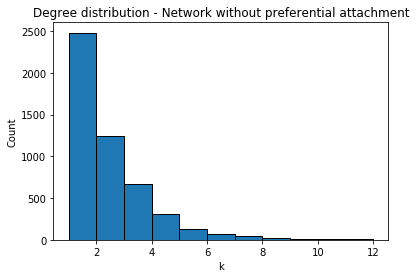

In [41]:
hist, bins = np.histogram(degree_sequence,bins=np.unique(degree_sequence))
fig, ax = plt.subplots()
ax.bar(bins[:-1], hist, width=np.diff(bins), edgecolor="black", align="edge")
ax.set_ylabel('Count')
ax.set_xlabel('k')
ax.set_title("Degree distribution - Network without preferential attachment")
plt.show() 

_Figure 5_1: Bar-plot showing the Degree distribution of the network build without preferential attachment and manually created bins._

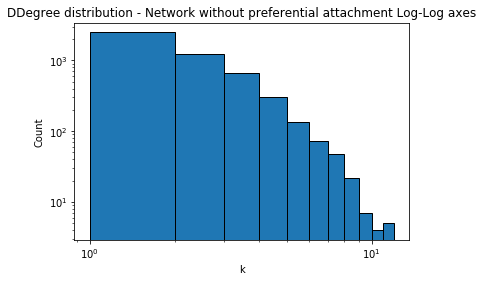

In [42]:
fig, ax = plt.subplots()
ax.bar(bins[:-1], hist, width=np.diff(bins), edgecolor="black", align="edge")
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Count')
ax.set_xlabel('k')
ax.set_title("DDegree distribution - Network without preferential attachment Log-Log axes")
plt.show()

_Figure 5_2: Bar-plot showing the Degree distribution of the network build without preferential attachment and manually created bins and log transformed axes._

**Compare to the ER network of same size and same $p$. What are the differences? Explain in your own words.**

In [43]:
print("Barabasi-Albert network")
print(f"The maximum degree is {max(deg_values)}")
print(f"The maximum degree is {min(deg_values)}")
print(f"The average degree is {sum(deg_values)/n}")

Barabasi-Albert network
The maximum degree is 143
The maximum degree is 1
The average degree is 2.0


In [44]:
print("ER-netowrk")
print(f"Maximum degree is: {dmax}")
print(f"Minimum degree is: {dmin}")
print(f"The average degree is {sum(degree_sequence)/n}")

ER-netowrk
Maximum degree is: 12
Minimum degree is: 1
The average degree is 1.9996


The differences between the two networks can be seen in the degree distribution. The BA network growth depends on preferential attachment (Network Science by Albert-Laszlo Barabasi section 5.3). Therefore the BA network is more likely to have few nodes with really high degrees and a lot of nodes with a degree of 1. 
For the ER network, where a nodes link is selected at random, the degree distribution is more binomial distributed. That means there are a lower max degree value and there are more nodes with medium degree values

Since we are building the 2 networks from a network with 2 nodes and 1 edge, and we always add an edge between the new nodes, and an existing node both graphs will be one giant connected component.